   ## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import config
import random

from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from PIL import Image

from IPython.display import display


%matplotlib inline

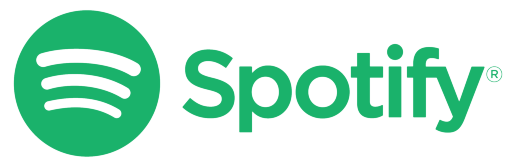

In [2]:
image = Image.open("Spotify_Logo.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
df= pd.read_csv("My_spotify_df.csv")



In [6]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.213,0.06560,7,-24.810,1,0.0467,0.992,0.969000,0.0699,0.0384,65.023,audio_features,3U8Fx7zNTQrctytkj6Gqgd,spotify:track:3U8Fx7zNTQrctytkj6Gqgd,https://api.spotify.com/v1/tracks/3U8Fx7zNTQrc...,https://api.spotify.com/v1/audio-analysis/3U8F...,150147,3
1,0.330,0.00357,3,-33.142,1,0.0339,0.995,0.953000,0.0989,0.1210,100.741,audio_features,6MzbO6YS0M6tjwT93hjAl0,spotify:track:6MzbO6YS0M6tjwT93hjAl0,https://api.spotify.com/v1/tracks/6MzbO6YS0M6t...,https://api.spotify.com/v1/audio-analysis/6Mzb...,216213,3
2,0.368,0.00363,1,-36.759,1,0.0350,0.993,0.922000,0.1370,0.0850,69.363,audio_features,1L4NadMj3Jj7YgGaikyhfr,spotify:track:1L4NadMj3Jj7YgGaikyhfr,https://api.spotify.com/v1/tracks/1L4NadMj3Jj7...,https://api.spotify.com/v1/audio-analysis/1L4N...,254000,3
3,0.320,0.00501,1,-33.366,1,0.0455,0.993,0.919000,0.0618,0.0383,68.947,audio_features,3hCPh4oVVjaM8tv9sFH8cx,spotify:track:3hCPh4oVVjaM8tv9sFH8cx,https://api.spotify.com/v1/tracks/3hCPh4oVVjaM...,https://api.spotify.com/v1/audio-analysis/3hCP...,294960,5
4,0.701,0.34100,1,-12.260,0,0.0418,0.499,0.903000,0.3590,0.1630,105.513,audio_features,5xbuJuQsTVheVZvX2AJVIv,spotify:track:5xbuJuQsTVheVZvX2AJVIv,https://api.spotify.com/v1/tracks/5xbuJuQsTVhe...,https://api.spotify.com/v1/audio-analysis/5xbu...,151507,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,0.326,0.09020,7,-20.588,1,0.0344,0.647,0.000910,0.1980,0.2180,137.611,audio_features,3his1UkcI0rwrniPDR9kTj,spotify:track:3his1UkcI0rwrniPDR9kTj,https://api.spotify.com/v1/tracks/3his1UkcI0rw...,https://api.spotify.com/v1/audio-analysis/3his...,219493,4
8077,0.266,0.34500,10,-11.484,1,0.0309,0.376,0.000019,0.1030,0.1990,145.980,audio_features,1aRncYBtdizYoVKcSt8oaY,spotify:track:1aRncYBtdizYoVKcSt8oaY,https://api.spotify.com/v1/tracks/1aRncYBtdizY...,https://api.spotify.com/v1/audio-analysis/1aRn...,176893,4
8078,0.364,0.12600,7,-18.071,1,0.0286,0.862,0.000203,0.0969,0.4300,90.429,audio_features,0VdcSHXCPRfQQZYQPXSlZ9,spotify:track:0VdcSHXCPRfQQZYQPXSlZ9,https://api.spotify.com/v1/tracks/0VdcSHXCPRfQ...,https://api.spotify.com/v1/audio-analysis/0Vdc...,189427,4
8079,0.333,0.50900,0,-7.191,1,0.0310,0.808,0.000225,0.1070,0.2190,122.917,audio_features,7FWSMnxbNWGQXS7Jz1Uxqg,spotify:track:7FWSMnxbNWGQXS7Jz1Uxqg,https://api.spotify.com/v1/tracks/7FWSMnxbNWGQ...,https://api.spotify.com/v1/audio-analysis/7FWS...,161693,4


### Creating a new df to train my KMEANS

In [7]:
X = df[['danceability', 'energy', 'key', 'loudness', "mode", 'speechiness', 'acousticness', 'instrumentalness', 'liveness', "valence" , "tempo"]]

In [8]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.213,0.06560,7,-24.810,1,0.0467,0.992,0.969000,0.0699,0.0384,65.023
1,0.330,0.00357,3,-33.142,1,0.0339,0.995,0.953000,0.0989,0.1210,100.741
2,0.368,0.00363,1,-36.759,1,0.0350,0.993,0.922000,0.1370,0.0850,69.363
3,0.320,0.00501,1,-33.366,1,0.0455,0.993,0.919000,0.0618,0.0383,68.947
4,0.701,0.34100,1,-12.260,0,0.0418,0.499,0.903000,0.3590,0.1630,105.513
...,...,...,...,...,...,...,...,...,...,...,...
8076,0.326,0.09020,7,-20.588,1,0.0344,0.647,0.000910,0.1980,0.2180,137.611
8077,0.266,0.34500,10,-11.484,1,0.0309,0.376,0.000019,0.1030,0.1990,145.980
8078,0.364,0.12600,7,-18.071,1,0.0286,0.862,0.000203,0.0969,0.4300,90.429
8079,0.333,0.50900,0,-7.191,1,0.0310,0.808,0.000225,0.1070,0.2190,122.917


## ➡️ Train KMEANS

##  1. Scaling features

**K-Means is a distance based algorithm**: we need to scale / normalize!:


In [9]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

# my x scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

display(X.head())

print()
display(X_scaled_df.head())




,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.213,0.06560,7,-24.810,1,0.0467,0.992,0.969,0.0699,0.0384,65.023
1,0.330,0.00357,3,-33.142,1,0.0339,0.995,0.953,0.0989,0.1210,100.741
2,0.368,0.00363,1,-36.759,1,0.0350,0.993,0.922,0.1370,0.0850,69.363
3,0.320,0.00501,1,-33.366,1,0.0455,0.993,0.919,0.0618,0.0383,68.947
4,0.701,0.34100,1,-12.260,0,0.0418,0.499,0.903,0.3590,0.1630,105.513


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-2.091400,-2.338732,0.485004,-3.009033,0.726162,-0.328547,2.051296,3.495528,-0.709021,-1.979382,-1.900186
1,-1.430834,-2.592698,-0.643263,-4.567740,0.726162,-0.526447,2.060726,3.431632,-0.544085,-1.678720,-0.666378
2,-1.216291,-2.592452,-1.207397,-5.244390,0.726162,-0.509440,2.054439,3.307833,-0.327393,-1.809759,-1.750270
3,-1.487292,-2.586802,-1.207397,-4.609645,0.726162,-0.347101,2.054439,3.295853,-0.755090,-1.979746,-1.764639
4,0.663781,-1.211175,-1.207397,-0.661243,-1.377104,-0.404306,0.501590,3.231957,0.935223,-1.525840,-0.501539


### Now, all features will have the same weight.

# 2. Chosing k

### ➡️ Appling the Elbow Method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

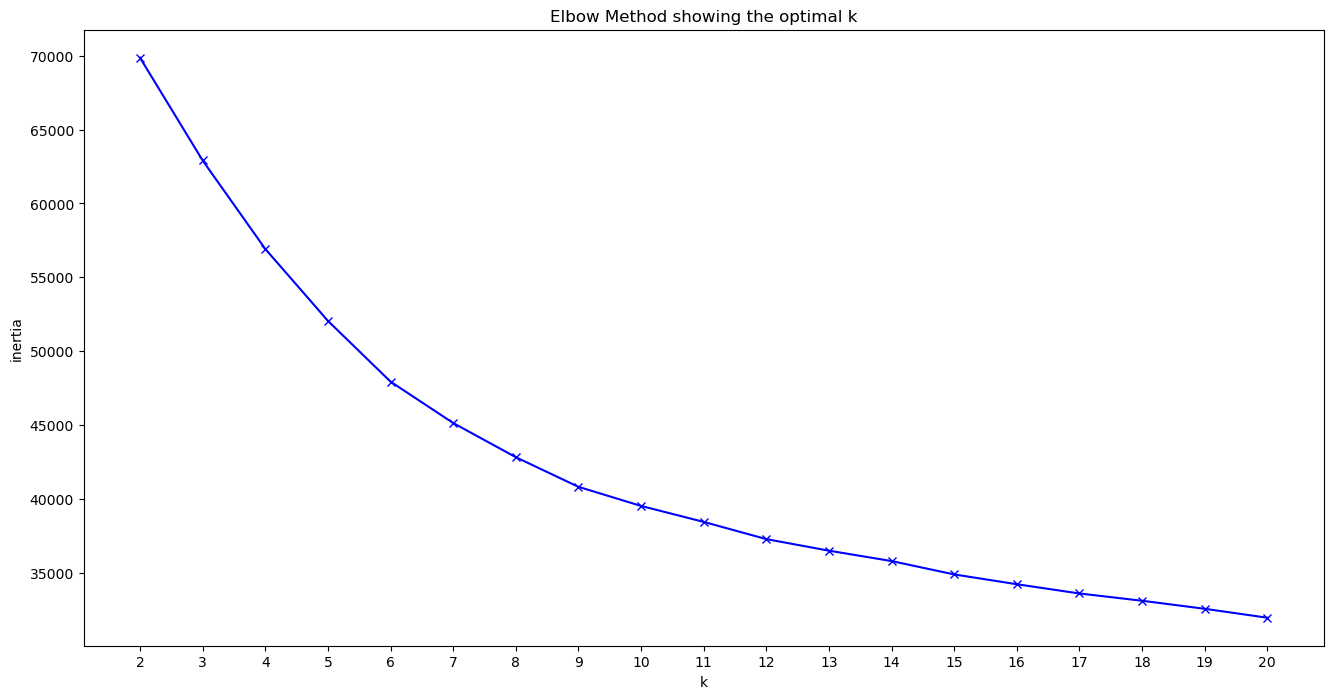

In [10]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

## ➡️ Appling the Silouhette Method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

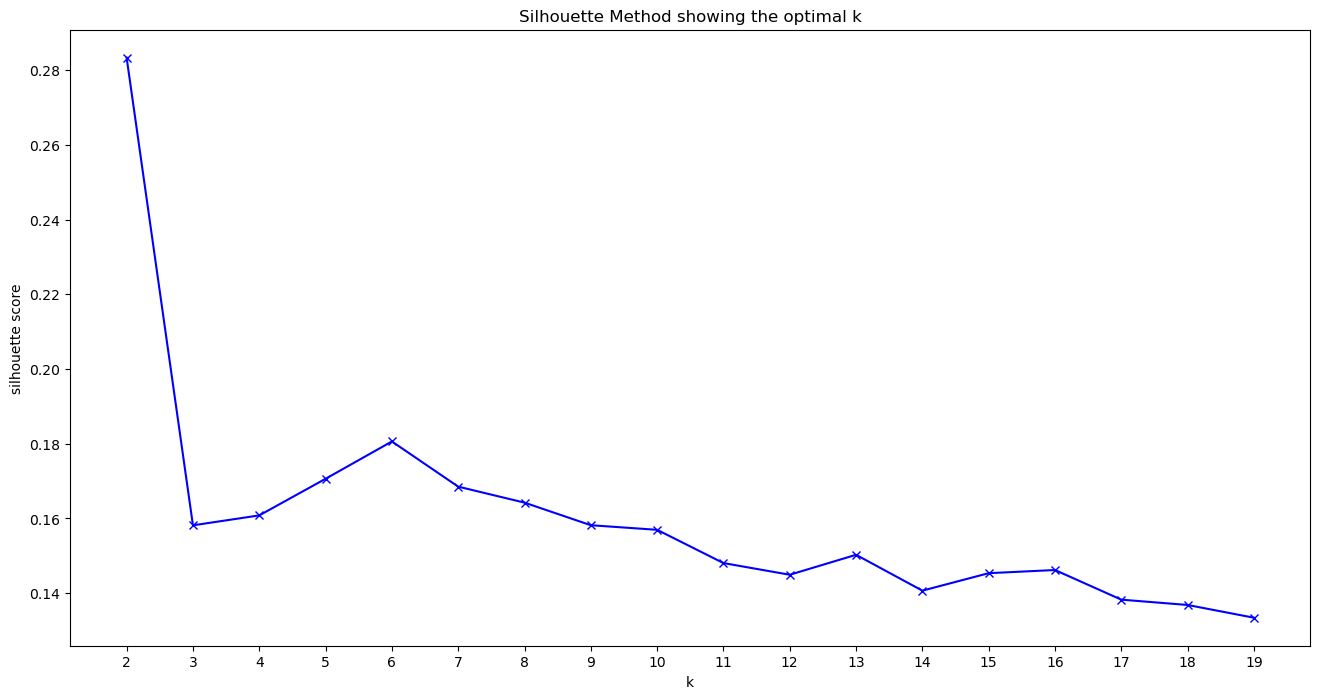

In [11]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Optional

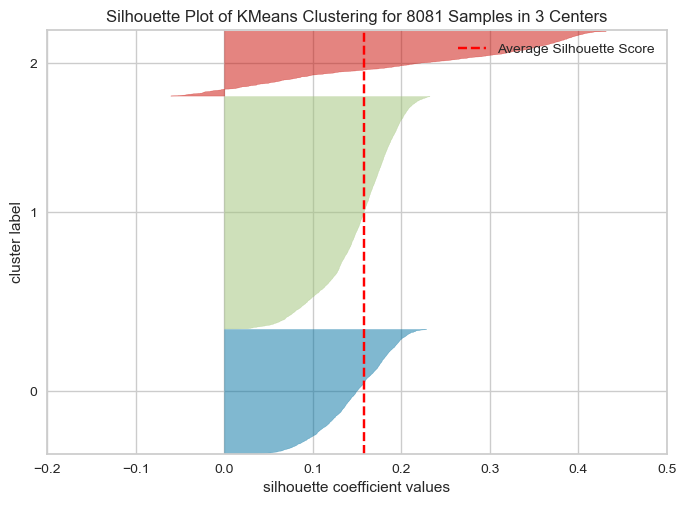

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8081 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

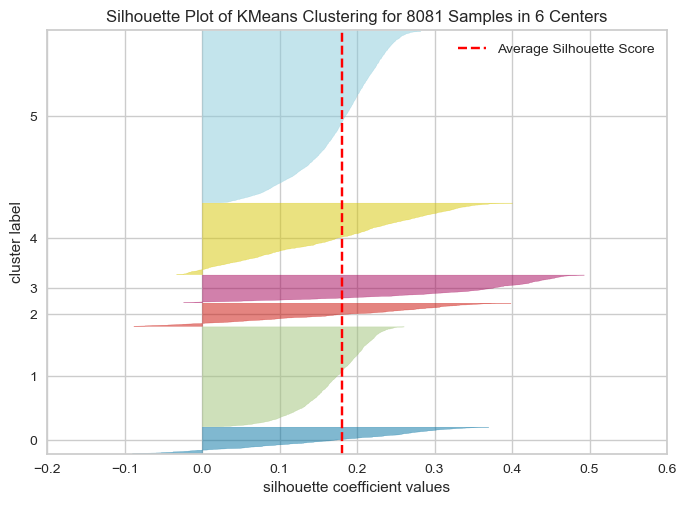

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8081 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

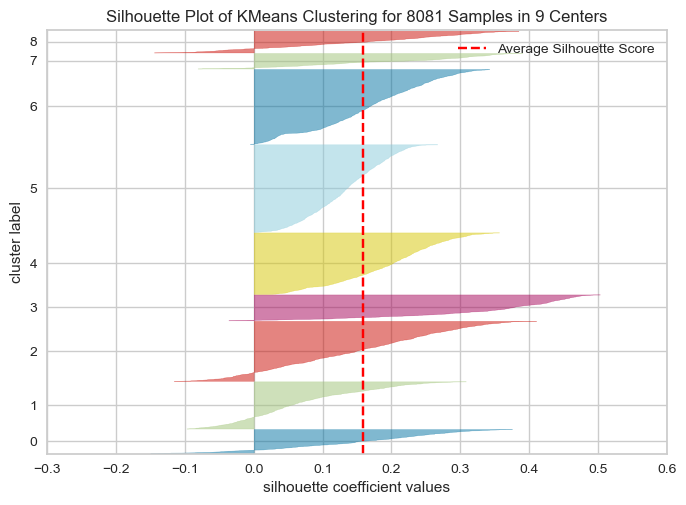

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8081 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(9, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 3. Creating and Fitting a  K-Means Clustering Model


###  kmeans 01

In [15]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [16]:
kmeans.inertia_

47932.63249249884

###  kmeans 02

In [17]:
kmeans2 = KMeans(n_clusters=6,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

49629.49886345555


### Let's get the labels

In [18]:
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 5, 5, 5])

In [19]:
#np.unique(labels)

array([0, 1, 2, 3, 4, 5])

### Now we have our "model", let's get the clusters and how many observations has each cluster.

In [38]:
clusters = kmeans.predict(X_scaled_df)
clusters
#clusters
# we are counting how many songs we have for each cluster using series of operations on a pandas Series
pd.Series(clusters).value_counts().sort_index()

0     445
1    1921
2    3299
3     530
4     511
5    1375
dtype: int64

In [21]:
len(clusters)

8081

### Scatter Plot

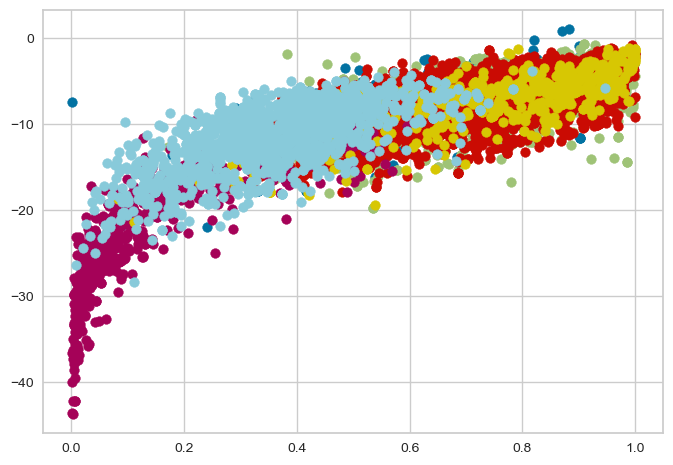

In [39]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters01 = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters01:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

### Now let's see to which group was assigned every song 🎶🎵

In [40]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5])

In [41]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters

C:\Users\espan\AppData\Local\Temp\ipykernel_18852\465844916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


### ---------------------------------------------------------------------------------------

👀👀👀👀👀👀👀👀 ⁉️

In [42]:
X[X['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
1450,0.635,0.841,5,-5.379,1,0.0422,0.0134,0.0,0.0622,0.424,109.021,2


### ---------------------------------------------------------------------------------------

## ⚠️ Preparing everything to be able to get the user input

## Loading credentials from another config file

In [43]:
import config

## Starting with Spotify API

In [44]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame

In [45]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

### Creating the Final dataframe with id and cluster

In [46]:
final_df = pd.merge(X, df[['id']], left_index=True, right_index=True)

In [47]:
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
0,0.213,0.06560,7,-24.810,1,0.0467,0.992,0.969000,0.0699,0.0384,65.023,3,3U8Fx7zNTQrctytkj6Gqgd
1,0.330,0.00357,3,-33.142,1,0.0339,0.995,0.953000,0.0989,0.1210,100.741,3,6MzbO6YS0M6tjwT93hjAl0
2,0.368,0.00363,1,-36.759,1,0.0350,0.993,0.922000,0.1370,0.0850,69.363,3,1L4NadMj3Jj7YgGaikyhfr
3,0.320,0.00501,1,-33.366,1,0.0455,0.993,0.919000,0.0618,0.0383,68.947,3,3hCPh4oVVjaM8tv9sFH8cx
4,0.701,0.34100,1,-12.260,0,0.0418,0.499,0.903000,0.3590,0.1630,105.513,3,5xbuJuQsTVheVZvX2AJVIv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,0.326,0.09020,7,-20.588,1,0.0344,0.647,0.000910,0.1980,0.2180,137.611,5,3his1UkcI0rwrniPDR9kTj
8077,0.266,0.34500,10,-11.484,1,0.0309,0.376,0.000019,0.1030,0.1990,145.980,5,1aRncYBtdizYoVKcSt8oaY
8078,0.364,0.12600,7,-18.071,1,0.0286,0.862,0.000203,0.0969,0.4300,90.429,5,0VdcSHXCPRfQQZYQPXSlZ9
8079,0.333,0.50900,0,-7.191,1,0.0310,0.808,0.000225,0.1070,0.2190,122.917,5,7FWSMnxbNWGQXS7Jz1Uxqg


## User input 👀✅


# ----------------------------------------

In [48]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

# ----------------------------------------

In [49]:
billboard_hot_100 = pd.read_csv("hotsongs_file.csv")

# convert the column song into lower case
billboard_hot_100["song"] = billboard_hot_100["song"].str.lower()

# ----------------------------------------

In [50]:
# ASK TO MY USER ENTER A SONG

# User input song name
user_input = input("Enter your favorite song and descover if it is in Billboard Hot 100 : ")

user_input_lower = user_input.lower()

user_input_search = sp.search(q = user_input_lower, type='track', limit=1)

song_id = user_input_search["tracks"]["items"][0]["id"]


display(play_song(song_id))

verified = input("Please, Could you confirm me if this is your song? Yes or No: ")

###########################################################################

if verified == "yes":
    
    print("Perfect!, let's see if this is in the Billboard hot 100!")
    
    
    #Lower case sensitive

    song_name_lower = user_input.lower()

    song_found = False

    # Matching Songs between the Billboard hot 100 and  User input

    matching_songs = billboard_hot_100[billboard_hot_100["song"].str.contains(song_name_lower, case=False)]


    for index, row in billboard_hot_100.iterrows():
    
         if row["song"] == song_name_lower:
        
               song_found = True
               # print("Congrats!! :) your song is in the Bilboard Hot 100")
        
               print(f"Congrats!! :) your song {user_input } is in the Bilboard Hot 100")
        
               random_music = random.choice(billboard_hot_100["song"])
        
               print("I will provide you another song from this Billboard Hot 100 list, I am sure you will enjoy it:",random_music)
         
               random_music_search = sp.search(q = random_music, type='track', limit=1)

               random_song_id = random_music_search["tracks"]["items"][0]["id"]
               
               display(play_song(random_song_id))
                
                
 ##########################################################################     
        
         else:
            print("So Sorry :( The song:", user_input, " is not in the Billboard hot 100 list :( ...but I can recommend you a similar song!!")

            
    ## Search ID, AF 
    ## Getting the Audio feature of a song
            AF_user_song = sp.audio_features(song_id)
        
    # Creating a Data frame with the audio features of my user inputs
            df_user = pd.DataFrame(AF_user_song)
        
    # Creating a Data frame but this time with only the features needed for the model
            df_user_model = df_user[['danceability', 'energy', 'key', 'loudness', "mode", 'speechiness', 'acousticness', 'instrumentalness', 'liveness', "valence" , "tempo"]]
    
    # Scaling the user audio features DataFrame
            scaler.transform(df_user_model)
    
    # Transforming the scaled data
            audio_user_features_scaled = scaler.transform(df_user_model)
    
    
    # Apply KMeans prediction to user_scaled_df 
            user_cluster = kmeans.predict(audio_user_features_scaled)
    
    
    # Filter recommended songs based on predicted cluster
    # DataFrame final_df contains the cluster and ID of the song
            
            recommended_songs_from_cluster = final_df[final_df['cluster'] == user_cluster[0]]
    # Select a random song from recommended songs
            recommended_song = recommended_songs_from_cluster.sample(n=1)
    
    # Retrieve track_id of recommended song
            recommended_track_id = recommended_song['id'].values[0]
    
    # Display the recommended song
            display(play_song(recommended_track_id))
            
    # Ask to our user if they like our recommendation       
            user_input2 = input("Di you like our recommendation? Yes/No: ")
        
    # Display the recommended song   
            
            if user_input2 == "yes":
    
                print("Yei! I am happy we could recommend you a nice song!")
        
            else:
                
                print("ohh! :( so sorry for that, I will recommend you another one :) !")
                
                 # Select a random song from recommended songs
                recommended_song = recommended_songs_from_cluster.sample(n=1)
    
                # Retrieve track_id of recommended song
                recommended_track_id = recommended_song['id'].values[0]
    
                # Display the recommended song
                display(play_song(recommended_track_id))
    
    # Exit the loop
            break

    

        
else:
    
    print("So Sorry :(  Could you try again? Im sure in this second time you will get your song!")
    
    #print("So Sorry :(   The song: ",user_input, " is not in the Billboard hot 100 list :(  ...buut I can recommend you a similar song!!")
    


Enter your favorite song and descover if it is in Billboard Hot 100 : macarena


Please, Could you confirm me if this is your song? Yes or No: yes
Perfect!, let's see if this is in the Billboard hot 100!
So Sorry :( The song: macarena  is not in the Billboard hot 100 list :( ...but I can recommend you a similar song!!


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=4oaj36KzXRgDg4McgcTsZK:
 Max Retries, reason: too many 429 error responses

✅✅

### -----------------------------------------------------------------------

### -----------------------------------------------------------------------

### BACKLOG

In [ ]:
# ASK TO MY USER ENTER A SONG

# User input song name
user_input = input("Enter your favorite song and descover if it is in Billboard Hot 100 : ")

user_input_lower = user_input.lower()

user_input_search = sp.search(q = user_input_lower, type='track', limit=1)

song_id = user_input_search["tracks"]["items"][0]["id"]


display(play_song(song_id))

verified = input("Please, Could you confirm me if this is your song? Yes or No: ")

###########################################################################

if verified == "yes":
    
    print("Perfect!, let's see if this is in the Billboard hot 100!")
    
    
    #Lower case sensitive

    song_name_lower = user_input.lower()

    song_found = False

    # Matching Songs between the Billboard hot 100 and  User input

    matching_songs = billboard_hot_100[billboard_hot_100["song"].str.contains(song_name_lower, case=False)]


    for index, row in billboard_hot_100.iterrows():
    
         if row["song"] == song_name_lower:
        
               song_found = True
               # print("Congrats!! :) your song is in the Bilboard Hot 100")
        
               print(f"Congrats!! :) your song {user_input } is in the Bilboard Hot 100")
        
               random_music = random.choice(billboard_hot_100["song"])
        
               print("I will provide you another song from this Billboard Hot 100 list, I am sure you will enjoy it:",random_music)
         
               random_music_search = sp.search(q = random_music, type='track', limit=1)

               random_song_id = random_music_search["tracks"]["items"][0]["id"]
               
               display(play_song(random_song_id))
                
                
 ##########################################################################     
        
         else:
            print("So Sorry :( The song:", user_input, " is not in the Billboard hot 100 list :( ...but I can recommend you a similar song!!")

            
    ## Search ID, AF 
    ## Getting the Audio feature of a song
            AF_user_song = sp.audio_features(song_id)
        
    # Creating a Data frame with the audio features of my user inputs
            df_user = pd.DataFrame(AF_user_song)
        
    # Creating a Data frame but this time with only the features needed for the model
            df_user_model = df_user[['danceability', 'energy', 'key', 'loudness', "mode", 'speechiness', 'acousticness', 'instrumentalness', 'liveness', "valence" , "tempo"]]
    
    # Scaling the user audio features DataFrame
            scaler.transform(df_user_model)
    
    # Transforming the scaled data
            audio_user_features_scaled = scaler.transform(df_user_model)
    
    
    # Apply KMeans prediction to user_scaled_df 
            user_cluster = kmeans.predict(audio_user_features_scaled)
    
    
    # Filter recommended songs based on predicted cluster
    # DataFrame final_df contains the cluster and ID of the song
            
            recommended_songs_from_cluster = final_df[final_df['cluster'] == user_cluster[0]]
    # Select a random song from recommended songs
            recommended_song = recommended_songs_from_cluster.sample(n=1, random_state=1234)
    
    # Retrieve track_id of recommended song
            recommended_track_id = recommended_song['id'].values[0]
    
    # Display the recommended song
            display(play_song(recommended_track_id))
    
    # Exit the loop
            break

    

        
else:
    
    print("So Sorry :(  Could you try again? Im sure in this second time you will get your song!")
    
    #print("So Sorry :(   The song: ",user_input, " is not in the Billboard hot 100 list :(  ...buut I can recommend you a similar song!!")
    
